In [1]:
import os
import sys
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))
sys.path.append(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src/scripts/demo_202107'))

In [2]:
# Table dimension
T_Width = 1.8
T_Height = 0.785
T_Depth = 0.734

In [3]:
from pkg.controller.combined_robot import *
from pkg.project_config import *

crob = CombinedRobot(robots_on_scene=[
    RobotConfig(0, RobotType.indy7, None,
                INDY_IP)]
              , connection_list=[False])

connection command:
indy0: False


In [4]:
from pkg.geometry.builder.scene_builder import SceneBuilder
s_builder = SceneBuilder(None)
# # deprecated: s_builder.reset_reference_coord(ref_name="floor")

In [5]:
# xyz_rpy_robots = s_builder.detect_items(level_mask=[DetectionLevel.ROBOT])
xyz_rpy_robots = {"indy0": ((0,0,0), (0,0,np.pi))}
crob.update_robot_pos_dict(xyz_rpy_robots=xyz_rpy_robots)
gscene = s_builder.create_gscene(crob)

Please create a subscriber to the marker
publication OK
published: [0, 0, 0, 0, 0, 0]


In [6]:
gtems = s_builder.add_robot_geometries(color=(0,1,0,0.5), display=True, collision=True)
gscene.set_workspace_boundary( -1.5, 1.5, -1, 1, -0.1, 1.75)

Please create a subscriber to the marker


In [7]:
# geometry 추가
from pkg.geometry.geotype import GEOTYPE
mobile_base = gscene.create_safe(gtype=GEOTYPE.BOX, name="mobile_base", link_name="base_link", 
                   dims=(0.6,0.4,0.439), center=(0,0,-0.439/2), rpy=(0,0,0), 
                   color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=False)
floor = gscene.create_safe(gtype=GEOTYPE.BOX, name="floor", link_name="base_link", 
                   dims=(6,6,0.01), center=(0,0,-0.439), rpy=(0,0,0), 
                   color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=False)

In [8]:
for gtem in gscene:
    round_it_str(gtem.dims)
    round_it_str(gtem.center)

In [9]:
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="cam", link_name="indy0_tcp", 
                   dims=(0.061,0.061,0.026), center=(-0.0785,0,0.013), rpy=(0,0,0), 
                   color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=False)

gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="cam_col", link_name="indy0_tcp", 
                   dims=(0.081,0.081,0.046), center=(-0.0785,0,0.013), rpy=(0,0,0), 
                   color=(0.0,1,0,0.3), display=True, fixed=True, collision=True)

viewpoint = gscene.create_safe(gtype=GEOTYPE.SPHERE, name="viewpoint", link_name="indy0_tcp", 
                   dims=(0.01,0.01,0.01), center=(0,0,0), rpy=(0,0,-np.pi/2), 
                   color=(1,0,0,0.3), display=True, fixed=True, collision=False, parent="cam")

gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="body", link_name="indy0_tcp", 
                   dims=(0.067,0.067,0.0335), center=(-0.0785,0,-0.01675), rpy=(0,0,0), 
                   color=(0.8,0.8,0.8,1), display=True, fixed=True, collision=False)

gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="body_col", link_name="indy0_tcp", 
                   dims=(0.087,0.087,0.0535), center=(-0.0785,0,-0.01675), rpy=(0,0,0), 
                   color=(0.0,1,0,0.3), display=True, fixed=True, collision=True)

gscene.create_safe(gtype=GEOTYPE.SPHERE, name="backhead", link_name="indy0_tcp", 
                   dims=(0.067,0.067,0.067), center=(-0.0785,0,-0.0335), rpy=(0,0,0), 
                   color=(0.8,0.8,0.8,1), display=True, fixed=True, collision=False)

gscene.create_safe(gtype=GEOTYPE.SPHERE, name="backhead_col", link_name="indy0_tcp", 
                   dims=(0.087,0.087,0.087), center=(-0.0785,0,-0.0335), rpy=(0,0,0), 
                   color=(0.0,1,0,0.3), display=True, fixed=True, collision=True)

In [10]:
gscene.update_markers_all()

In [11]:
from math import *
gscene = gscene
robot_name="indy0"
face_name="brush_face"

gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_adapter".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0025), dims=(0.09, 0.09, 0.005), rpy=(0, 0, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_adapter_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0025), dims=(0.13, 0.13, 0.005), rpy=(0, 0, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge0".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0125), dims=(0.022, 0.036, 0.025), rpy=(0, 0, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge0_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0125), dims=(0.062, 0.076, 0.025), rpy=(0, 0, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_bar".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.053, 0, 0.068), dims=(0.011, 0.020, 0.15), rpy=(0, 1*pi/4, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_bar_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.053, 0, 0.068), dims=(0.051, 0.060, 0.15), rpy=(0, 1*pi/4, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge1".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1085,0,0.121), dims=(0.025, 0.036, 0.022), rpy=(0, 0, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge1_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1085,0,0.121), dims=(0.025, 0.076, 0.062), rpy=(0, 0, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_brushbase".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1285,0,0.121), dims=(0.08, 0.08, 0.015), rpy=(0, pi/2, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_brushbase_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1285,0,0.121), dims=(0.12, 0.12, 0.015), rpy=(0, pi/2, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name=face_name, link_name="{}_tcp".format(robot_name),
                   center=(0.147,0,0.121), dims=(0.037, 0.10, 0.34), rpy=(np.pi, 0, pi), color=(1.0, 1.0, 0.94, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_col".format(face_name), link_name="{}_tcp".format(robot_name),
                   center=(0.127,0,0.121), dims=(0.057, 0.10, 0.36), rpy=(np.pi, 0, pi), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

In [12]:
from pkg.planning.constraint.constraint_actor import Gripper2Tool, PlacePlane, SweepFramer, FixtureSlot
pscene.create_binder(bname="brush_face", gname="brush_face", _type=SweepFramer, point=(-gscene.NAME_DICT['brush_face'].dims[0]/2,0,0), 
                     rpy=(0,np.pi/2*1,0))

NameError: name 'pscene' is not defined

In [15]:
# Start streaming & Save color, depth image
# Return is intrinsic parameter, depth_scale of camera
cam_intrins, d_scale = camera_streaming()

In [16]:
import SharedArray as sa
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

IMG_URI = "shm://color_img"
MASK_URI = "shm://mask_img"
REQ_URI = "shm://request"
RESP_URI = "shm://response"

color_img_p = sa.attach(IMG_URI)
return_img_p = sa.attach(MASK_URI)
request_p = sa.attach(REQ_URI)
resp_p = sa.attach(RESP_URI)

def detect_from_server(image):
    color_img_p[:] = image[:]
    request_p[:] = 1
    while not resp_p[0]:
        time.sleep(0.01)
    resp_p[:] = 0
    return np.copy(return_img_p.astype(np.bool))

In [17]:
# Set color, depth image path
# color_img_path = SAVE_DIR + '/color.jpg'
# depth_img_path = SAVE_DIR + '/depth.png'
color_img_path = DATASET_DIR + '/color.jpg'
depth_img_path = DATASET_DIR + '/depth.png'

# Read color, depth image file, keep 16bit information
color_img_read = cv2.imread(color_img_path, flags=cv2.IMREAD_UNCHANGED)
depth_img_read = cv2.imread(depth_img_path, flags=cv2.IMREAD_UNCHANGED)

In [18]:
# Output of inference(mask for detected table)
mask_out = detect_from_server(color_img_read)

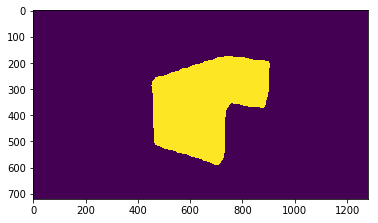

In [19]:
plt.imshow(mask_out)

In [20]:
# Crop masking part
vis_mask = (mask_out * 255).astype('uint8')
color_instance = cv2.bitwise_and(color_img_read, color_img_read, mask=vis_mask).astype(np.uint16)
depth_instance = cv2.bitwise_and(depth_img_read, depth_img_read, mask=vis_mask).astype(np.uint16)
cv2.imwrite(CROP_DIR + '/color_crop.jpg', color_instance)
cv2.imwrite(CROP_DIR + '/depth_crop.png', depth_instance)

True

In [21]:
import open3d as o3d
import numpy as np
import cv2
import copy
import os
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#import subprocess
#subprocess.call(['python3', 'detection.py'])

In [22]:
def ransac_plane_fitting(img_path):
    # Find plane through ransac plane fitting
    #depth_raw = o3d.io.read_image("/home/jhkim/Projects/rnb-planning/src/scripts/demo_202107/save_img/depth.png")
    depth_raw = o3d.io.read_image(img_path)
    depth_pcd_raw = o3d.geometry.PointCloud.create_from_depth_image(depth_raw,
                                            o3d.camera.PinholeCameraIntrinsic(cam_intrins.width,
                                            cam_intrins.height, cam_intrins.fx, cam_intrins.fy,
                                            cam_intrins.ppx, cam_intrins.ppy), depth_scale = 1/d_scale)
    #depth_pcd_raw = o3d.geometry.PointCloud.create_from_depth_image(depth_raw, o3d.camera.PinholeCameraIntrinsic(640, 480, 
    #                                                                                                  461.734375, 462.06640625, 
    #                                                                                                  350.4140625, 244.541015625), depth_scale = 4000.0)

    plane_model, inliers = depth_pcd_raw.segment_plane(distance_threshold=0.01,
                                             ransac_n=8,
                                             num_iterations=2000)
    [a, b, c, d] = plane_model
    print("Coeffs of eq of fitting plane are :")
    print(a,b,c,d)
    return plane_model
    #print(f"Plane equation: {a:.5f}x + {b:.5f}y + {c:.5f}z + {d:.5f} = 0")

In [23]:
cam_intrins.fx, cam_intrins.fy, cam_intrins.ppx, cam_intrins.ppy, d_scale

(899.05322265625,
 899.21044921875,
 654.8836669921875,
 352.9295654296875,
 0.0002500000118743628)

In [24]:
def preprocessing():
    # Load CAD model of table leg
    model_mesh = o3d.io.read_triangle_mesh(MODEL_DIR + '/table_leg_scaling.STL')
    #model_pcd = model_mesh.sample_points_uniformly(number_of_points=300)

    # Load Depth image to make point clouds
    depth = o3d.io.read_image(CROP_DIR + '/depth_crop.png')
    depth_pcd = o3d.geometry.PointCloud.create_from_depth_image(depth,
                                            o3d.camera.PinholeCameraIntrinsic(cam_intrins.width,
                                            cam_intrins.height, cam_intrins.fx, cam_intrins.fy,
                                            cam_intrins.ppx, cam_intrins.ppy),
                                            depth_scale = 1/d_scale)
    
    # Remove noise points which put very far from camera
    thres = np.linalg.norm(depth_pcd.get_center())
    depth_pcd = o3d.geometry.PointCloud.create_from_depth_image(depth,
                                            o3d.camera.PinholeCameraIntrinsic(cam_intrins.width,
                                            cam_intrins.height, cam_intrins.fx, cam_intrins.fy,
                                            cam_intrins.ppx, cam_intrins.ppy),
                                            depth_scale = 1/d_scale, depth_trunc = thres * 1.5)

    o3d.visualization.draw_geometries([depth_pcd])
    

    # Convert point clouds to numpy array
    xyz_points = np.array(depth_pcd.points)

    # Kmeans Clustering to classify front, back legs of table
    # Ideally, if noise does not exist, then number of cluster is 2
    kmeans = KMeans(n_clusters = 2, random_state = 0)
    kmeans.fit(xyz_points)

    # Re-convert numpy array to point clouds in type of o3d point clouds
    pcd1 = o3d.geometry.PointCloud()
    pcd2 = o3d.geometry.PointCloud()
    xyz_1 = np.vstack([xyz_points[kmeans.labels_ == 0,0], xyz_points[kmeans.labels_ == 0,1], xyz_points[kmeans.labels_ == 0,2]])
    xyz_2 = np.vstack([xyz_points[kmeans.labels_ == 1,0], xyz_points[kmeans.labels_ == 1,1], xyz_points[kmeans.labels_ == 1,2]])
    pcd1.points = o3d.utility.Vector3dVector(xyz_1.T)
    pcd2.points = o3d.utility.Vector3dVector(xyz_2.T)
    #FOR_origin = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.15, origin=[0,0,0])
    
    #o3d.visualization.draw_geometries([pcd1, FOR_origin])
    #o3d.visualization.draw_geometries([pcd2, FOR_origin])
    
    # Divide front and back legs of table
    dist_1 = np.linalg.norm(pcd1.get_center())
    dist_2 = np.linalg.norm(pcd2.get_center())
    
    if (abs(dist_1 - dist_2) < 0.8):
        # Original depth point clouds include front legs only
        # Not Do clustering
        pcd_out = depth_pcd
        
    else:
        # Original depth point clouds include front and back legs together, so clustering is reasonable
        # Do clustering
        if (dist_1 > dist_2):
            # The clustering result would be random for order of points
            # So, shortest distance point clouds set front legs
            pcd_out = pcd1
#             tmp = pcd2
#             pcd2 = pcd1
#             pcd1 = tmp

    
    #o3d.visualization.draw_geometries([pcd1, FOR_origin])
    return model_mesh, pcd_out

In [35]:
def draw_registration_result_original_color(source, target, transformation):
    source_temp = copy.deepcopy(source)
    source_temp.transform(transformation)
    FOR_origin = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.15, origin=[0,0,0])
    
    FOR_model = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.15, origin=[0,0,0])
    FOR_model.transform(transformation)
    FOR_model.translate(source_temp.get_center()-FOR_model.get_center())
    
    FOR_target = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.15, origin=target.get_center())
    o3d.visualization.draw_geometries([source_temp, target, FOR_origin])

In [36]:
model_mesh, pcd_out = preprocessing()

In [37]:
def compute_ICP(model_mesh, pcd):
    # Compute ICP to align model(source) to obtained point clouds(target)
    target = copy.deepcopy(pcd)
    model_pcd = model_mesh.sample_points_uniformly(number_of_points=int(len(np.array(target.points)*0.8)))
    source = copy.deepcopy(model_pcd)
    #source.translate((-T_Height/2, -T_Depth/2, 0.0), relative=True)
    source_cpy = copy.deepcopy(model_pcd)
    source_cpy.translate((-T_Height, -T_Depth, 0.0), relative=True)

    # Guess Initial Transformation
    center = target.get_center()
    trans_init = np.identity(4)
    trans_init[0:3,3] = center.T
    source_cpy.transform(trans_init)
    trans_init[0:3,3] = source_cpy.get_center().T
    draw_registration_result_original_color(source, target, trans_init)

    print("Apply point-to-point ICP")
    threshold = 0.10
    reg_p2p = o3d.registration.registration_icp(source, target, threshold, trans_init,
            o3d.registration.TransformationEstimationPointToPoint(),
            o3d.registration.ICPConvergenceCriteria(max_iteration = 600000))
    print(reg_p2p)
    print("Transformation is:")
    print(reg_p2p.transformation)
    draw_registration_result_original_color(source, target, reg_p2p.transformation)
    ICP_result = reg_p2p.transformation
    
    source.transform(ICP_result)
    #o3d.visualization.draw_geometries([source, target])
    return ICP_result   

In [38]:
from math import *

In [39]:
from math import *
ICP_result1 = compute_ICP(model_mesh, pcd_out)
#ICP_result2 = compute_ICP(model_mesh, pcd2)


# # ICP결과에 대한 회전 보정
# y_axis = np.matmul(ICP_result1[0:3,0:3], [[0], [1], [0]])
# z_axis = np.array([[a], [b], [c]])
# z_axis = z_axis/np.linalg.norm(z_axis)
# theta = np.arccos(np.dot(y_axis.T, z_axis))
# ICP_result = np.matmul(ICP_result1, SE3(Rot_axis(1, deg2rad(theta)), [0]*3)) 


# ICP결과에 대한 높이 보정
raw_img = SAVE_DIR + "/depth.png"
[a, b, c, d] = ransac_plane_fitting(raw_img)
FOR_result = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.15, origin=[0,0,0])
FOR_result.transform(ICP_result1)
model_mesh.transform(ICP_result1)
x, y, z = model_mesh.get_center()
dist = abs((a*x + b*y + c*z + d)/sqrt(a*a + b*b + c*c))

if (dist > T_Depth):
    trans = dist - T_Depth
    FOR_result.translate((0, trans, 0), relative=True)
elif (dist < T_Depth):
    trans = T_Depth - dist
    FOR_result.translate((0, -trans, 0), relative=True)

result = copy.deepcopy(ICP_result1)  
result[0:3, 3] = (FOR_result.get_center()).T

Apply point-to-point ICP
registration::RegistrationResult with fitness=1.000000e+00, inlier_rmse=6.560083e-03, and correspondence_set size of 36119
Access transformation to get result.
Transformation is:
[[ 0.88254758 -0.01338898  0.47003245 -0.52331786]
 [ 0.19394655  0.92097274 -0.33792596 -0.23680507]
 [-0.42836259  0.38939691  0.815399    2.35569695]
 [ 0.          0.          0.          1.        ]]
Coeffs of eq of fitting plane are :
(-0.02490163085716633, 0.9399318813156584, 0.34045259180546783, -1.342125169806849)


In [40]:
result = copy.deepcopy(ICP_result1)  
result[0:3, 3] = FOR_result.get_center()

In [41]:
indy = crob.robot_dict["indy0"]

In [42]:
VIEW_POSE = np.deg2rad([  0., -28.,  85.,  -0.,  57., 179.])
gscene.show_pose(VIEW_POSE)
viewpoint.draw_traj_coords([VIEW_POSE])

In [44]:
from pkg.utils.rotation_utils import *
TABLE_DIMS = np.array((0.785,1.80,0.735))
#OFF_DIR = np.array([1,1,-1])
OFF_DIR = np.array([1,1,0])
#TABLE_DIMS[[0,1,2]]
#np.hstack([TABLE_DIMS[[0,1]], [0]])
T_toff = SE3(Rot_axis(3,np.pi), np.divide(TABLE_DIMS[[0,1,2]]*OFF_DIR,2))
T_co = np.matmul(np.matmul(result, SE3(Rot_axis(1, np.pi/2), [0]*3)), T_toff)
T_lo = np.matmul(viewpoint.Toff, T_co)
T_bc = viewpoint.get_tf(list2dict(VIEW_POSE, gscene.joint_names))
T_bo=np.matmul(T_bc, T_co)
T_bo

array([[ 4.63937059e-01, -8.85666535e-01,  1.88995293e-02,
         3.34208478e+00],
       [ 8.85798009e-01,  4.64063252e-01,  2.68625106e-03,
        -5.43541970e-02],
       [-1.11496945e-02,  1.54949041e-02,  9.99817789e-01,
         4.19197856e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [45]:
#T_bo[2,3] = TABLE_DIMS[2]/2

gscene.add_highlight_axis("table", "center", link_name="base_link", center=T_bo[:3,3], orientation_mat=T_bo[:3,:3])

# geometry 추가
table = gscene.create_safe(gtype=GEOTYPE.BOX, name="table", link_name="base_link", 
                   dims=TABLE_DIMS, center=T_bo[:3,3], rpy=Rot2rpy(T_bo[:3,:3]), 
                   color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=False)

In [46]:
# 모서리부분 근접 촬영
_, _ = camera_streaming()
print(cam_intrins.fx, cam_intrins.fy, cam_intrins.ppx, cam_intrins.ppy)

(899.05322265625, 899.21044921875, 654.8836669921875, 352.9295654296875)


In [47]:
#img_path = SAVE_DIR + '/table_.png'
img_path = DATASET_DIR + "/table_11.png"
#depth_img, lines, plane_est = line_detect(img_path)

In [51]:
def get_inliers(img_path):
    depth_raw = o3d.io.read_image(img_path) 
    depth_pcd_raw = o3d.geometry.PointCloud.create_from_depth_image(depth_raw,
                                        o3d.camera.PinholeCameraIntrinsic(cam_intrins.width,
                                        cam_intrins.height,cam_intrins.fx, cam_intrins.fy,
                                        cam_intrins.ppx, cam_intrins.ppy), depth_scale = 1/d_scale, depth_trunc = 0.8)
    
    plane_model, inliers = depth_pcd_raw.segment_plane(distance_threshold=0.005,
                                             ransac_n=7,
                                             num_iterations=1500)
    [a, b, c, d] = plane_model
    print("Coeffs of eq of fitting plane are :")
    print(a,b,c,d)

    # Inlier points from ransac plane fitting
    p_inliers = []
    for i in range(len(inliers)):
        p_inliers.append(depth_pcd_raw.points[i])

    pcd_inliers = o3d.geometry.PointCloud()
    pcd_inliers.points = o3d.utility.Vector3dVector(p_inliers)
    o3d.visualization.draw_geometries([depth_pcd_raw])
    o3d.visualization.draw_geometries([pcd_inliers])
    return p_inliers

In [52]:
p_inliers = get_inliers(img_path)

Coeffs of eq of fitting plane are :
(0.1822480548618096, 0.6195453968821717, 0.7635110658668931, -0.49464600996923724)


In [53]:
Qcur = np.load(DATASET_DIR + '/tablepose_11.npy')
T_bc = viewpoint.get_tf(list2dict(Qcur, gscene.joint_names))
viewpoint.draw_traj_coords([Qcur])
gscene.show_pose(Qcur)

In [54]:
gscene.add_highlight_axis("ax", "base", "base_link", center=(0,)*3, orientation_mat=np.identity(3))
T_bc

array([[-0.04693046, -0.79950171,  0.59882765,  0.2387776 ],
       [-0.98718519,  0.1286579 ,  0.09440641,  0.406914  ],
       [-0.15252199, -0.58672324, -0.7952942 ,  0.76506845],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [55]:
def point_proj(T_bc, p_inliers):
    x_bo = []
    y_bo = []
    for i in range(len(p_inliers)):
        vec = np.hstack([p_inliers[i], [1]]).T
        xyz_point = np.matmul(T_bc, vec)
        #points_bo.append(xyz_point[0:2])
        x_bo.append(xyz_point[0])
        y_bo.append(xyz_point[1])
    plt.plot(x_bo, y_bo)
    return x_bo, y_bo

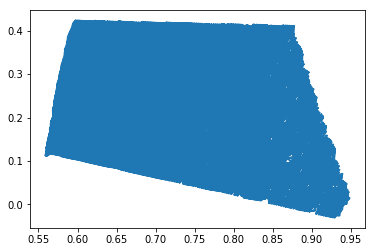

In [56]:
import matplotlib.pyplot as plt
x_bo, y_bo = point_proj(T_bc, p_inliers)

In [57]:
def left_corner(x_bo, y_bo):
    # for left corner
    TABLE_DIMS = np.array((0.785,1.80,0.735))
    TABLE_DIMS[[0,1,2]]
    OFF_DIR = np.array([1,-1,1])
    idx_x_min = np.argmin(x_bo)
    idx_x_max = np.argmax(x_bo)
    idx_y_min = np.argmin(y_bo)
    idx_y_max = np.argmax(y_bo)

    # First, find edge in view of case 1
    # case 1
    edge_left = np.array((x_bo[idx_y_max], y_bo[idx_y_max], -0.439))
    p = np.array((x_bo[idx_x_min], y_bo[idx_x_min], -0.439))
    case = 1
    num = edge_left[0] - p[0]
    den = edge_left[1] - p[1]
    theta = np.arctan(num/den)
    print(y_bo[idx_y_max])
    print(edge_left[1])

    if (edge_left[1] != y_bo[idx_y_max]):
        # actually, it is case 2
        edge_left = np.array((x_bo[idx_x_min], y_bo[idx_x_min], -0.439))
        p = np.array((x_bo[idx_y_max], y_bo[idx_y_max], -0.439))
        case = 2
        num = edge_left[1] - p[1]
        den = edge_left[0] - p[0]
        theta = np.arctan(num/den)

    print(y_bo[idx_y_max])
    print(edge_left[1])

    T_bo = np.identity(4)
    # orientation of table
    if (case == 1):
        T_bo[:3,:3] = Rot_axis(3,deg2rad(-theta))
    elif (case == 2):
        T_bo[:3,:3] = Rot_axis(3,deg2rad(theta))
    T_bo[:3,3] = (edge_left.T + np.divide(TABLE_DIMS[[0,1,2]]*OFF_DIR,2).T)
    return T_bo

In [58]:
def right_corner(x_bo, y_bo):
    # for right corner
    TABLE_DIMS = np.array((0.785,1.80,0.735))
    TABLE_DIMS[[0,1,2]]
    OFF_DIR = np.array([1,1,1])
    idx_x_min = np.argmin(x_bo)
    idx_x_max = np.argmax(x_bo)
    idx_y_min = np.argmin(y_bo)
    idx_y_max = np.argmax(y_bo)

    # First, find edge in view of case 1
    # case 1
    edge_right = np.array((x_bo[idx_x_min], y_bo[idx_x_min], -0.439))
    p = np.array((x_bo[idx_y_max], y_bo[idx_y_max], -0.439))
    case = 1
    num = p[0] - edge_right[0]
    den = p[1] - edge_right[1]
    theta = np.arctan(num/den)
    print(x_bo[idx_x_min])
    print(edge_right[0])

    if (edge_right[0] != x_bo[idx_x_min]):
         # actually, it is case 2
        #case 2
        edge_left = np.array((x_bo[idx_y_min], y_bo[idx_y_min], -0.439))
        p = np.array((x_bo[idx_x_max], y_bo[idx_x_max], -0.439))
        case = 2
        num = p[1] - edge_right[1]
        den = p[0] - edge_right[0]
        theta = np.arctan(num/den)
    print(x_bo[idx_x_min])
    print(edge_right[0])


    T_bo = np.identity(4)
    T_bo[:3,3] = (edge_right.T + np.divide(TABLE_DIMS[[0,1,2]]*OFF_DIR,2).T)
    # orientation of table
    if (case == 1):
        T_bo[:3,:3] = Rot_axis(3,deg2rad(-theta))
    elif (case == 2):
        T_bo[:3,:3] = Rot_axis(3,deg2rad(theta))
    return T_bo

In [59]:
# left corner를 찍었는지, right corenr를 찍은건지에 대한 정보는 들어와야할듯
# 이게 들어오면

from pkg.utils.rotation_utils import *
MODE = 'left'
#MODE = 'right'
if (MODE == 'left'):
    T_bo = left_corner(x_bo, y_bo)

if (MODE == 'right'):
    T_bo = right_corner(x_bo, y_bo)

0.42416586992169275
0.42416586992169275
0.42416586992169275
0.42416586992169275


In [60]:
TABLE_DIMS = np.array((0.785,1.80,0.735))
TABLE_DIMS[[0,1,2]]
gscene.add_highlight_axis("table", "center", link_name="base_link", center=T_bo[:3,3], orientation_mat=T_bo[:3,:3])

# geometry 추가
table = gscene.create_safe(gtype=GEOTYPE.BOX, name="table", link_name="base_link", 
                   dims=TABLE_DIMS, center=T_bo[:3,3], rpy=Rot2rpy(T_bo[:3,:3]), 
                   color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=False)